### Dot Walk

#### consider only the walking trials 

- compute skeletal loading metrics for right and left limb (total and each axis)
- compute the frequency response for right and left limb (total)
- compute the total power

In [46]:
import os
import glob
import matplotlib.pyplot as plt
import helpers as h # contains the computations
import numpy as np
import pandas as pd
import json
from scipy.signal import correlate

In [47]:
# read in all the clean data
base = "../data/clean/"
sensor = "dot"

data = h.read_in_clean_dot_data(base)
print(data.keys())

# trials to exlude (first one of walk to allow for a practice trial)
exclude = ["sw2", "bw16", ] 

reading dot data files from ../data/clean/
['exp1', 'exp2']
['exp1', 'exp2']
dict_keys(['baseline', 'flight'])


In [48]:
# outputs

# computation inputs
sampling_rate = 60
lc_off = 0.1
hc_off = 6
filter_order = 5
filter_type = "bandpass"

exp = 1

load_outputs = {}

for key in data.keys():
    load_outputs[key] = {}
    for k in data[key][f"exp{exp}"].keys():
        load_outputs[key][k] = {}
        for t in data[key][f"exp{exp}"][k].keys():
            
            if "w" in  t and t not in exclude:
                load_outputs[key][k][t] = {}

                # compute left limb
                load_outputs[key][k][t]["left"] = {}
                df = data[key][f"exp{exp}"][k][t][0]
                total_li, x_li, y_li, z_li = h.compute_skeletal_loading_metrics(df, sampling_rate, lc_off, hc_off, filter_order, filter_type)
                load_outputs[key][k][t]["left"]["total_li"] = total_li
                load_outputs[key][k][t]["left"]["x_li"] = x_li
                load_outputs[key][k][t]["left"]["y_li"] = y_li
                load_outputs[key][k][t]["left"]["z_li"] = z_li
                
                # compute left limb
                load_outputs[key][k][t]["right"] = {}
                df = data[key][f"exp{exp}"][k][t][1]
                total_li, x_li, y_li, z_li = h.compute_skeletal_loading_metrics(df, sampling_rate, lc_off, hc_off, filter_order, filter_type)
                load_outputs[key][k][t]["right"]["total_li"] = total_li
                load_outputs[key][k][t]["right"]["x_li"] = x_li
                load_outputs[key][k][t]["right"]["y_li"] = y_li
                load_outputs[key][k][t]["right"]["z_li"] = z_li
#print(json.dumps(load_outputs, indent=4))

In [49]:
def compute_avg_for_keys(base):
    total_l = 0
    total_r = 0
    avg_load= 0

    # left axis
    total_x_l = 0
    total_y_l = 0
    total_z_l = 0

    # right axis
    total_x_r = 0
    total_y_r = 0
    total_z_r = 0

    axis_l = []
    axis_r = []

    for k in  base.keys():
        total_l += base[k]["left"]["total_li"]
        total_x_l += base[k]["left"]["x_li"]
        total_y_l += base[k]["left"]["y_li"]
        total_z_l += base[k]["left"]["z_li"]
        total_r += base[k]["right"]["total_li"]
        total_x_r += base[k]["right"]["x_li"]
        total_y_r += base[k]["right"]["y_li"]
        total_z_r += base[k]["right"]["z_li"]

    # compute averages
    l = len(base.keys())
    avg_l = round(total_l / l,2)
    avg_r = round(total_r / l,2)
    total_avg = round((avg_l + avg_r) / 2,2)

    axis_l.append(round(total_x_l / l,2))
    axis_l.append(round(total_y_l / l,2))
    axis_l.append(round(total_z_l / l,2))

    axis_r.append(round(total_x_r / l,2))
    axis_r.append(round(total_y_r / l,2))
    axis_r.append(round(total_z_r / l,2))
    
    return total_avg, avg_l, avg_r, axis_l, axis_r

#compute_avg_for_keys(load_outputs["baseline"]["shoes"])
baseline_s_avg_load, basline_s_l, baseline_s_r, baseline_s_axis_l, baseline_s_axis_r = compute_avg_for_keys(load_outputs["baseline"]["shoes"])
baseline_b_avg_load, basline_b_l, baseline_b_r, baseline_b_axis_l, baseline_b_axis_r = compute_avg_for_keys(load_outputs["baseline"]["barefoot"])
print("Baseline")
print(f"Shoes:     Total: {baseline_s_avg_load}, left: {basline_s_l}, right: {baseline_s_r} ")
print(f"Barefoot:  Total: {baseline_b_avg_load}, left: {basline_b_l}, right: {baseline_b_r} ")
print("Left Axis")
print(f"shoes:     x: {baseline_s_axis_l[0]},  y: {baseline_s_axis_l[1]},  z: {baseline_s_axis_l[2]}")
print(f"barefoot:  x: {baseline_b_axis_l[0]},  y: {baseline_b_axis_l[1]},  z: {baseline_b_axis_l[2]}")
print("Right Axis")
print(f"shoes:     x: {baseline_s_axis_r[0]},  y: {baseline_s_axis_r[1]},  z: {baseline_s_axis_r[2]}")
print(f"barefoot:  x: {baseline_b_axis_r[0]},  y: {baseline_b_axis_r[1]},  z: {baseline_b_axis_r[2]}")
print()

flight_s_avg_load, flight_s_l, flight_s_r, flight_s_axis_l, flight_s_axis_r = compute_avg_for_keys(load_outputs["flight"]["shoes"])
flight_b_avg_load, flight_b_l, flight_b_r, flight_b_axis_l, flight_b_axis_r = compute_avg_for_keys(load_outputs["flight"]["barefoot"])
print("Flight")
print(f"Shoes:     Total: {flight_s_avg_load}, left: {flight_s_l},  right: {flight_s_r} ")
print(f"Barefoot:  Total: {flight_b_avg_load}, left: {flight_b_l}, right: {flight_b_r} ")
print("Left Axis")
print(f"shoes:     x: {flight_s_axis_l[0]},  y: {flight_s_axis_l[1]},  z: {flight_s_axis_l[2]}")
print(f"barefoot:  x: {flight_b_axis_l[0]}, y: {flight_b_axis_l[1]},  z: {flight_b_axis_l[2]}")
print("Right Axis")
print(f"shoes:     x: {flight_s_axis_r[0]},  y: {flight_s_axis_r[1]},  z: {flight_s_axis_r[2]}")
print(f"barefoot:  x: {flight_b_axis_r[0]},  y: {flight_b_axis_r[1]}, z: {flight_b_axis_r[2]}")

Baseline
Shoes:     Total: 10.04, left: 9.58, right: 10.51 
Barefoot:  Total: 10.71, left: 9.97, right: 11.46 
Left Axis
shoes:     x: 10.14,  y: 7.85,  z: 9.77
barefoot:  x: 10.24,  y: 7.61,  z: 9.75
Right Axis
shoes:     x: 10.65,  y: 6.11,  z: 11.25
barefoot:  x: 11.31,  y: 7.62,  z: 10.55

Flight
Shoes:     Total: 10.31, left: 10.1,  right: 10.52 
Barefoot:  Total: 10.75, left: 10.57, right: 10.93 
Left Axis
shoes:     x: 7.6,  y: 6.57,  z: 13.81
barefoot:  x: 7.38, y: 7.89,  z: 14.36
Right Axis
shoes:     x: 6.68,  y: 7.0,  z: 13.89
barefoot:  x: 7.11,  y: 7.72, z: 14.09


In [50]:
# frequency response comparisons
include = ["sw4", "bw18", ]  # pick a set of trials

# computation inputs
sampling_rate = 60
lc_off = 0.1
hc_off = 6
filter_order = 5
filter_type = "high"

# build a high pass filter to remove low f noise
# only considers the lc_off if high pass
b,a = h.build_filter((lc_off, hc_off), sampling_rate, filter_type, filter_order)

exp = 1

freq_outputs = {}

for key in data.keys():
    freq_outputs[key] = {}
    for k in data[key][f"exp{exp}"].keys():
        freq_outputs[key][k] = {}
        for t in data[key][f"exp{exp}"][k].keys():       
            if "w" in  t and t  in include:
                freq_outputs[key][k][t] = {}
                # compute freq response left limb
                freq_outputs[key][k][t]["left"] = {}
                df = data[key][f"exp{exp}"][k][t][0]
                freq_graph = h.compute_frequency_response(df, sampling_rate, b,a)
                freq_outputs[key][k][t]["left"]["freq_res"] = freq_graph

                f_power = h.compute_power_spectrum(freq_graph[1])
                freq_outputs[key][k][t]["left"]["pwr"] =  round(np.sum(f_power),2)

                # compute freq response left limb
                freq_outputs[key][k][t]["right"] = {}
                df = data[key][f"exp{exp}"][k][t][1]
                freq_graph = h.compute_frequency_response(df, sampling_rate, b,a)
                freq_outputs[key][k][t]["right"]["freq_res"] = freq_graph

                f_power = h.compute_power_spectrum(freq_graph[1])
                freq_outputs[key][k][t]["right"]["pwr"] =  round(np.sum(f_power),2)

In [51]:
#correlate frequency response of left and right leg baseline to flight and within flight

# baseline f correlation left and left
b_s_l_fft = freq_outputs["baseline"]["shoes"][include[0]]["left"]["freq_res"][1]
b_b_l_fft = freq_outputs["baseline"]["barefoot"][include[1]]["left"]["freq_res"][1]

f_s_l_fft = freq_outputs["flight"]["shoes"][include[0]]["left"]["freq_res"][1]
f_b_l_fft = freq_outputs["flight"]["barefoot"][include[1]]["left"]["freq_res"][1]

b_l_cc = correlate(b_s_l_fft, b_b_l_fft, mode='full')
b_l_lag = lag = np.arange(-len(b_s_l_fft) + 1, len(b_s_l_fft))
b_l_max_corr_lag = b_l_lag[np.argmax(b_l_cc)]

f_l_cc = correlate(f_s_l_fft, f_b_l_fft, mode='full')
f_l_lag = lag = np.arange(-len(f_s_l_fft) + 1, len(f_s_l_fft))
f_l_max_corr_lag = f_l_lag[np.argmax(f_l_cc)]

b_l_max_cc = np.max(b_l_cc)
f_l_max_cc = np.max(f_l_cc)
print(f"Baseline Left Max Cross-Correlation: {b_l_max_cc}  at Lag: {b_l_max_corr_lag}")
print(f"Flight Left Max Cross-Correlation: {f_l_max_cc} at Lag: {f_l_max_corr_lag}")

Baseline Left Max Cross-Correlation: 0.5151249570358054  at Lag: -1
Flight Left Max Cross-Correlation: 0.526870784184793 at Lag: -2


In [52]:
# plot the frequency responses

print("Baseline Total Power")
for k in freq_outputs["baseline"]["shoes"].keys():
    print(f'shoes left: {freq_outputs["baseline"]["shoes"][k]["left"]["pwr"]}')
    print(f'shoes right: {freq_outputs["baseline"]["shoes"][k]["right"]["pwr"]}')
for k in freq_outputs["baseline"]["barefoot"].keys():   
    print(f'barefoot left: {freq_outputs["baseline"]["barefoot"][k]["left"]["pwr"]}')
    print(f'barefoot right: {freq_outputs["baseline"]["barefoot"][k]["right"]["pwr"]}')    
print()
print("Flight Total Power")
for k in freq_outputs["flight"]["shoes"].keys():
    print(f'shoes left: {freq_outputs["flight"]["shoes"][k]["left"]["pwr"]}')
    print(f'shoes right: {freq_outputs["flight"]["shoes"][k]["right"]["pwr"]}')
for k in freq_outputs["flight"]["barefoot"].keys():   
    print(f'barefoot left: {freq_outputs["flight"]["barefoot"][k]["left"]["pwr"]}')
    print(f'barefoot right: {freq_outputs["flight"]["barefoot"][k]["right"]["pwr"]}') 

Baseline Total Power
shoes left: 0.65
shoes right: 0.76
barefoot left: 0.84
barefoot right: 0.77

Flight Total Power
shoes left: 0.52
shoes right: 0.65
barefoot left: 0.86
barefoot right: 0.8


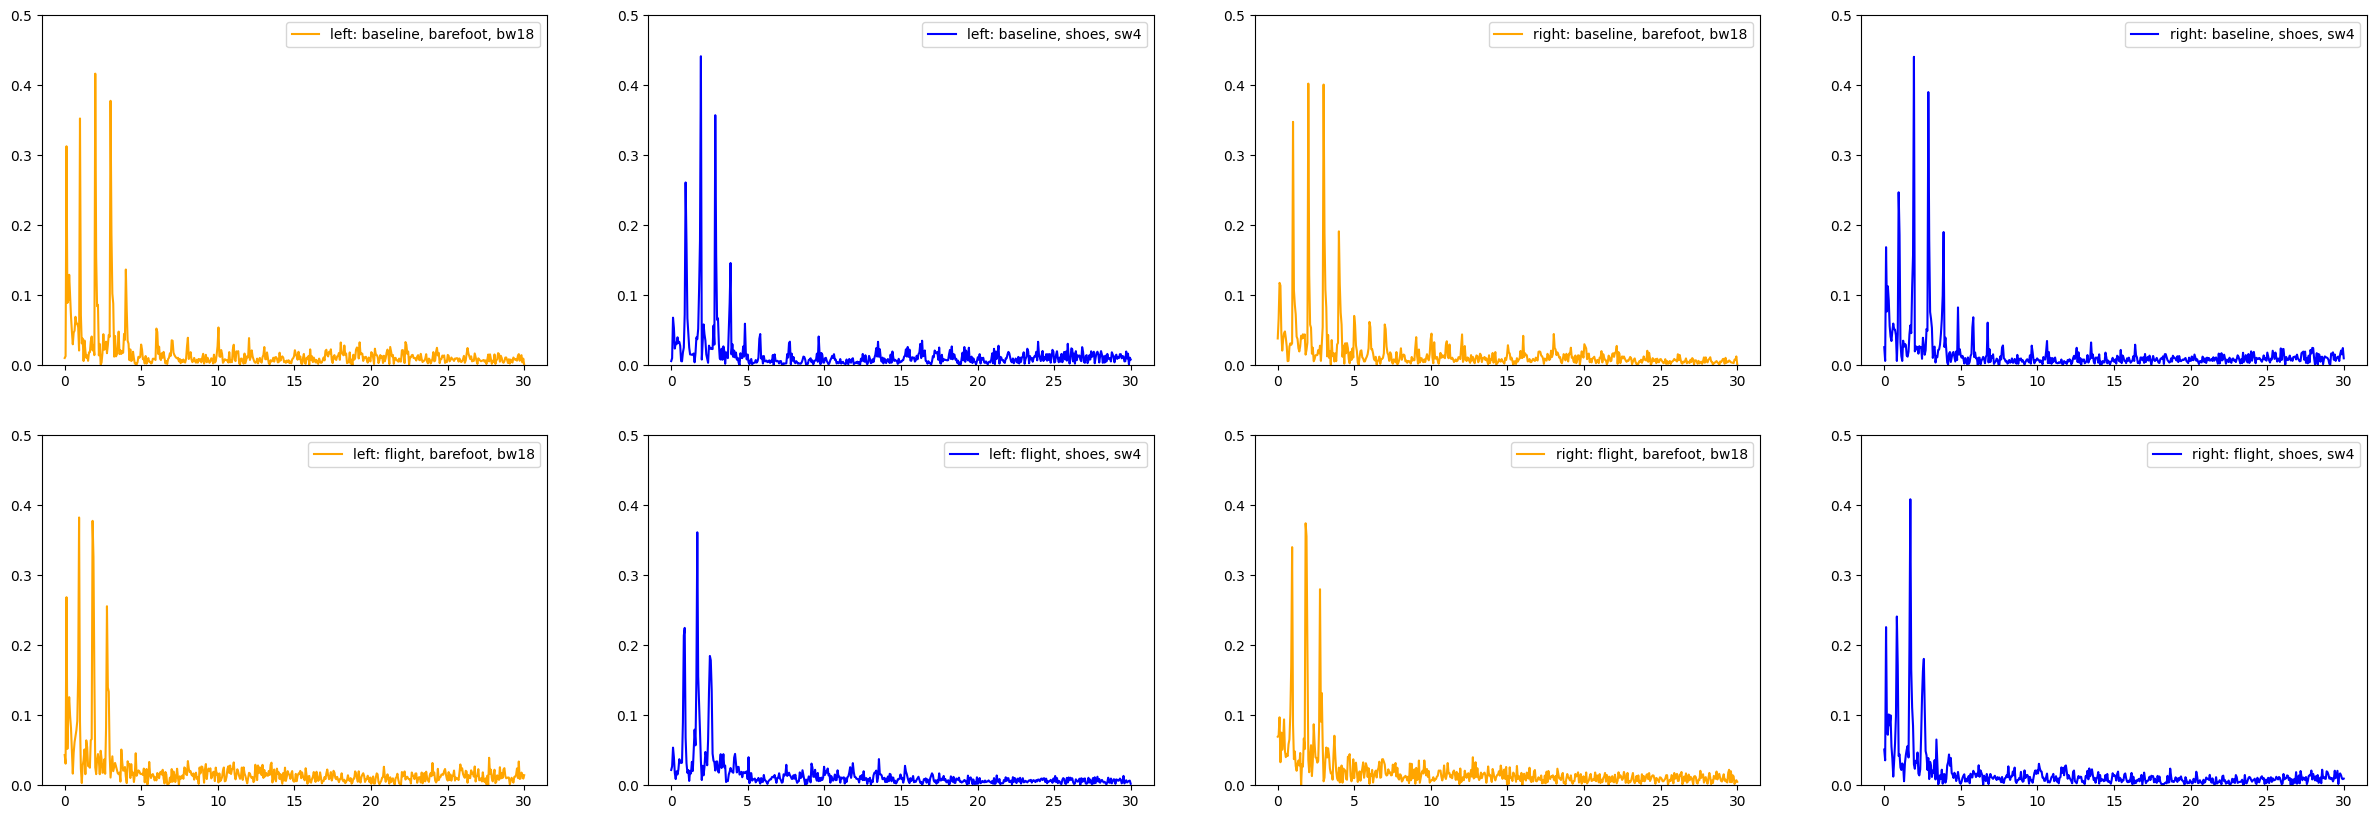

In [56]:
fig, ax = plt.subplots(2,4, figsize=(30, 10))

# baseline -> shoes left, right, barefoot, left, right

for idx, key in enumerate(freq_outputs.keys()):
    for i, k in enumerate(freq_outputs[key]):
        for a in freq_outputs[key][k].keys():
            #print(a)
            if(k=="barefoot"):
                color="orange"
            else:
                color="blue"
                
            t=freq_outputs[key][k][a]["left"]["freq_res"][0]
            f=freq_outputs[key][k][a]["left"]["freq_res"][1]
            ax[idx][i].plot(t, f, label=f"left: {key}, {k}, {a}", color=color)
            ax[idx][i].legend()
            ax[idx][i].set_ylim(0,0.5)
            t=freq_outputs[key][k][a]["right"]["freq_res"][0]
            f=freq_outputs[key][k][a]["right"]["freq_res"][1]
            ax[idx][i+2].plot(t, f, label=f"right: {key}, {k}, {a}", color=color)
            ax[idx][i+2].legend()
            ax[idx][i+2].set_ylim(0,0.5)

In [71]:
# what happens if we stich the trials together?

b_s_l = []
b_s_r = []
b_b_l = []


exp = 1

b_s_l_dfs = [] # collect data frames for baseline, shoes, left
b_s_r_dfs = [] # collect data frames for baseline, shoes, right
b_b_l_dfs = [] # collect data frames for baseline, barefoot, left
b_b_r_dfs = [] # collect data frames for baseline, barefoot, right

f_s_l_dfs = [] # collect data frames for flight, shoes, left
f_s_r_dfs = [] # collect data frames for flight, shoes, right
f_b_l_dfs = [] # collect data frames for flight, barefoot, left
f_b_r_dfs = [] # collect data frames for flight, barefoot, right


# collect the dataframes
for key in data.keys():
    load_outputs[key] = {}
    for k in data[key][f"exp{exp}"].keys():
        load_outputs[key][k] = {}
        for t in data[key][f"exp{exp}"][k].keys():
            if "w" in  t and t not in exclude:
                if(key=="baseline"):
                    if("s" in t):
                        b_s_l_dfs.append(data[key][f"exp{exp}"][k][t][0])
                        b_s_r_dfs.append(data[key][f"exp{exp}"][k][t][1])
                    elif("b" in t):
                        b_b_l_dfs.append(data[key][f"exp{exp}"][k][t][0])
                        b_b_r_dfs.append(data[key][f"exp{exp}"][k][t][1])
                elif(key=="flight"):
                    if("s" in t):
                        f_s_l_dfs.append(data[key][f"exp{exp}"][k][t][0])
                        f_s_r_dfs.append(data[key][f"exp{exp}"][k][t][1])
                    elif("b" in t):
                        f_b_l_dfs.append(data[key][f"exp{exp}"][k][t][0])
                        f_b_r_dfs.append(data[key][f"exp{exp}"][k][t][1])

# concat the dfs
b_s_l_dfs_stitched = pd.concat(b_s_l_dfs, ignore_index=True)
b_s_r_dfs_stitched = pd.concat(b_s_r_dfs, ignore_index=True)
b_b_l_dfs_stitched = pd.concat(b_b_l_dfs, ignore_index=True)
b_b_r_dfs_stitched = pd.concat(b_b_r_dfs, ignore_index=True)

f_s_l_dfs_stitched = pd.concat(f_s_l_dfs, ignore_index=True)
f_s_r_dfs_stitched = pd.concat(f_s_r_dfs, ignore_index=True)
f_b_l_dfs_stitched = pd.concat(f_b_l_dfs, ignore_index=True)
f_b_r_dfs_stitched = pd.concat(f_b_r_dfs, ignore_index=True)


3 3 3 3
3 3 3 3


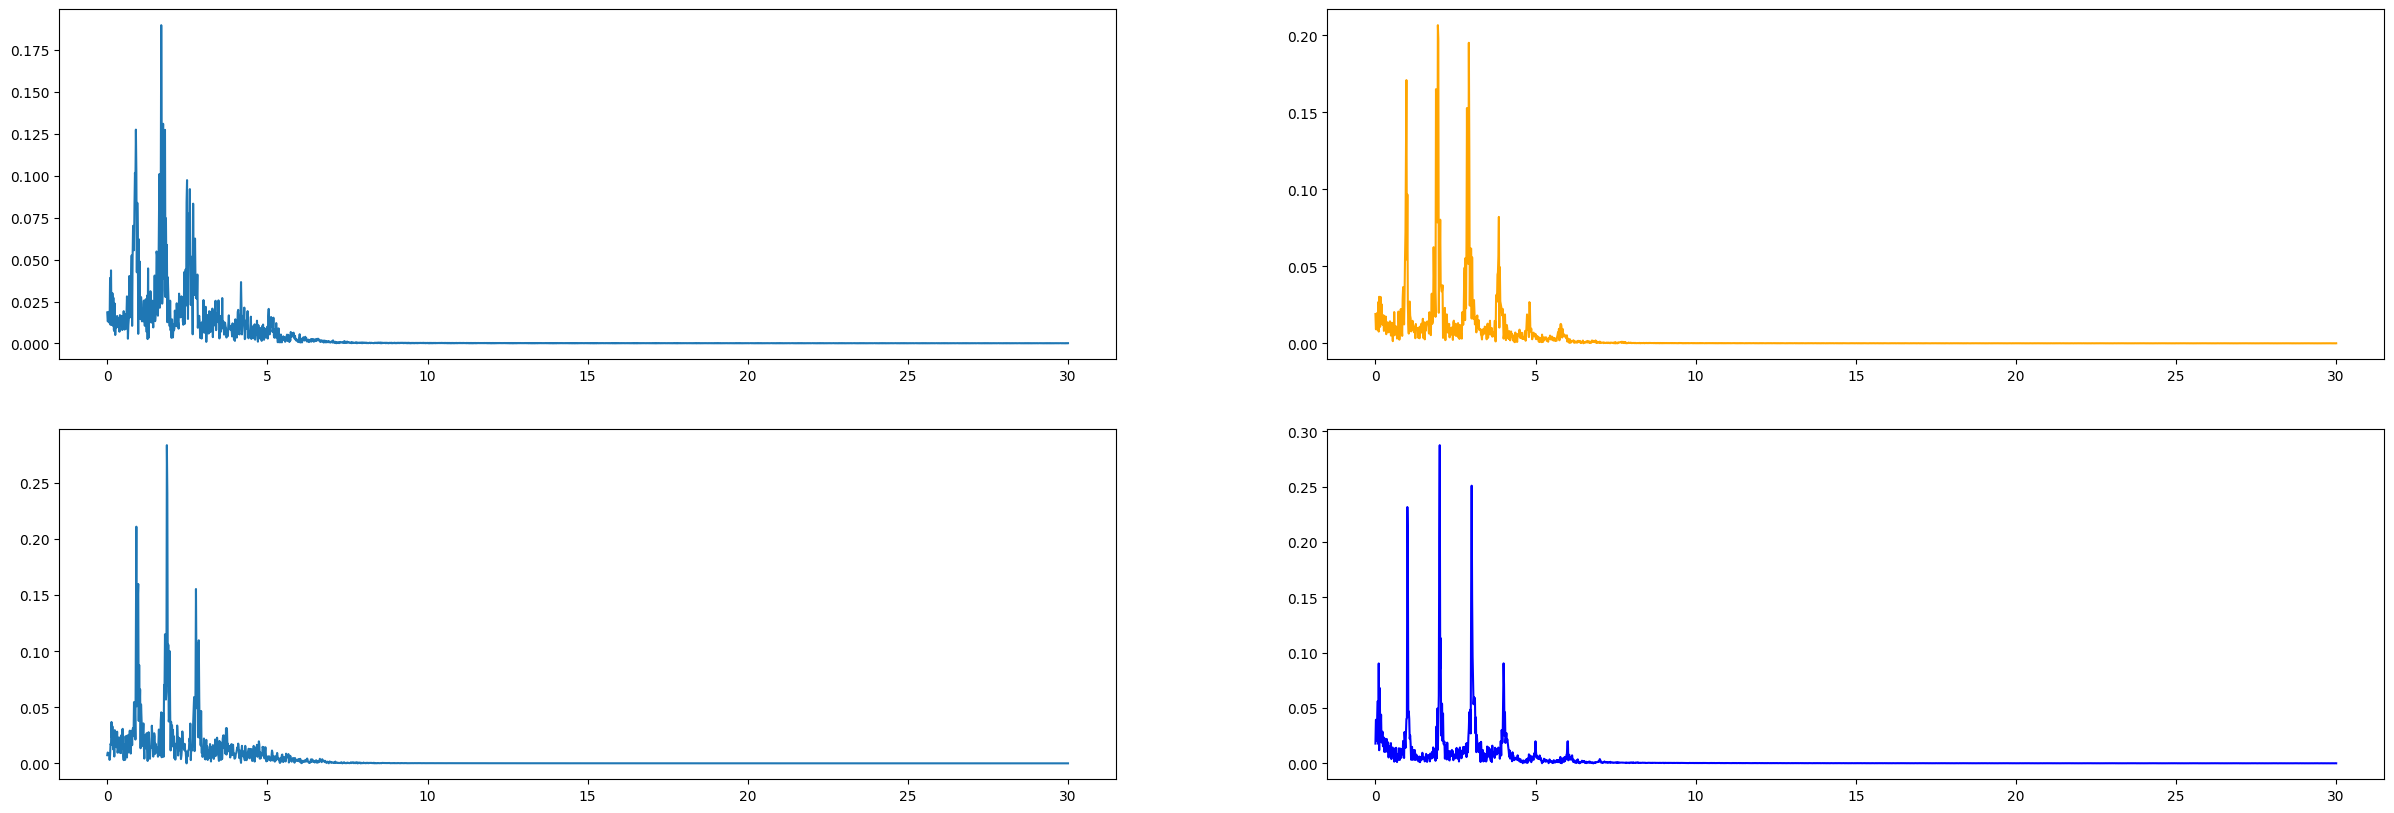

In [80]:
# now compute the loading metrics for each of the stiched dfs

sampling_rate = 60
lc_off = 0.1
hc_off = 6
filter_order = 5
filter_type = "bandpass"
exp = 1

#total_li, x_li, y_li, z_li = h.compute_skeletal_loading_metrics(b_s_l_dfs_stitched, sampling_rate, lc_off, hc_off, filter_order, filter_type)
#print(total_li)
b,a = h.build_filter((lc_off, hc_off), sampling_rate, filter_type, filter_order)

freq_graph = h.compute_frequency_response(f_s_l_dfs_stitched, sampling_rate, b,a)
freq_graph2 = h.compute_frequency_response(f_b_l_dfs_stitched, sampling_rate, b,a)
freq_graph3 = h.compute_frequency_response(b_s_l_dfs_stitched, sampling_rate, b,a)
freq_graph4 = h.compute_frequency_response(b_b_l_dfs_stitched, sampling_rate, b,a)
fig, ax = plt.subplots(2,2, figsize=(30, 10))

ax[0][0].plot(freq_graph[0], freq_graph[1], label=f"flight shoes")
ax[1][0].plot(freq_graph2[0], freq_graph2[1], label=f"flight barefoot")
ax[0][1].plot(freq_graph3[0], freq_graph3[1], label=f"baseline shoes", color="orange")
ax[1][1].plot(freq_graph4[0], freq_graph4[1], label=f"baseline barefoot", color="orange")

ax[0][0].legend()
ax[1][0].legend()
ax[0][1].legend()
ax[1][1].legend()